# Charging Site Characteristics

### Task Decsription
The hub operator provided you with the data set, but has seemed to forget
which site was supplying which data... Can you find out which of the two sites is the public one?
Try to combine data understanding from previous descriptive analytics with domain knowledge
(business understanding) of how private vs. public charging hubs might differ in operation. Explain
your line of thought!

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

ModuleNotFoundError: No module named 'matplotlib'

### Reading in the data

In [ ]:
df_charging_sessions = pd.read_csv("charging_sessions_preprocessed.csv",  parse_dates=['connectionTime','disconnectTime','doneChargingTime']);

# convert to local time
df_charging_sessions["connectionTime"] = df_charging_sessions["connectionTime"].dt.tz_convert("America/Los_Angeles")
df_charging_sessions["disconnectTime"] = df_charging_sessions["disconnectTime"].dt.tz_convert("America/Los_Angeles")
df_charging_sessions["doneChargingTime"] = df_charging_sessions["doneChargingTime"].dt.tz_convert("America/Los_Angeles")

# drop duplicates
print(len(df_charging_sessions['sessionID']))
print(len(df_charging_sessions['sessionID'].unique()))
df_charging_sessions = df_charging_sessions.drop_duplicates()
print(len(df_charging_sessions['sessionID']))
print(len(df_charging_sessions['sessionID'].unique()))

print(df_charging_sessions.info())
print(df_charging_sessions.head(4))

66450
65037
65037
65037
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65037 entries, 0 to 65036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype                              
---  ------               --------------  -----                              
 0   id                   65037 non-null  object                             
 1   connectionTime       65037 non-null  datetime64[ns, America/Los_Angeles]
 2   disconnectTime       65037 non-null  datetime64[ns, America/Los_Angeles]
 3   doneChargingTime     65037 non-null  datetime64[ns, America/Los_Angeles]
 4   kWhDelivered         65037 non-null  float64                            
 5   sessionID            65037 non-null  object                             
 6   siteID               65037 non-null  int64                              
 7   spaceID              65037 non-null  object                             
 8   stationID            65037 non-null  object                             
 9   user

After dropping the duplicates, each session is unique.

In [ ]:
print(f"There are two different Sites with the following IDs: {df_charging_sessions['siteID'].unique()}.")
df_sessions_site1 = df_charging_sessions[df_charging_sessions['siteID']==1]
df_sessions_site2 = df_charging_sessions[df_charging_sessions['siteID']==2]
print("The sites will be further looked at in the dataframes df_sessions_site1 and df_sessions_site2.")
print("Site 1:")
print(df_sessions_site1.head(4))
print("------------------------------------------------------------------------------------------------------------------------")
print("Site 2:")
print(df_sessions_site2.head(4))

There are two different Sites with the following IDs: [1 2].
The sites will be further looked at in the dataframes df_sessions_site1 and df_sessions_site2.
Site 1:
                         id            connectionTime  \
0  5e23b149f9af8b5fe4b973cf 2020-01-02 05:08:54-08:00   
1  5e23b149f9af8b5fe4b973d0 2020-01-02 05:36:50-08:00   
2  5e23b149f9af8b5fe4b973d1 2020-01-02 05:56:35-08:00   
3  5e23b149f9af8b5fe4b973d2 2020-01-02 05:59:58-08:00   

             disconnectTime          doneChargingTime  kWhDelivered  \
0 2020-01-02 11:11:15-08:00 2020-01-02 09:31:35-08:00        25.016   
1 2020-01-02 14:38:21-08:00 2020-01-02 12:18:05-08:00        33.097   
2 2020-01-02 16:39:22-08:00 2020-01-02 08:35:06-08:00         6.521   
3 2020-01-02 08:38:39-08:00 2020-01-02 07:18:45-08:00         2.355   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810   
1  1_1_193_825_2020-01-02 13:36:49.599853   

### Data Exploration
A first data exploration has already taken place during data pre-processing. But to get a feel for the patterns of each site, a second data exploration is done.

In [ ]:
# sizes
print(df_sessions_site1.size)
print(df_sessions_site2.size)

470806
439712


In [ ]:
# analyzing times: connectionTime, disconnectTime, doneChargingTime

# first day of measurement
print(f"The first day of measurement of the feature connectionTime in site 1 is: {df_sessions_site1['connectionTime'].min()}")
print(f"The first day of measurement of the feature connectionTime in site 2 is: {df_sessions_site2['connectionTime'].min()}")
print(f"The first day of measurement of the feature disconnectTime in site 1 is: {df_sessions_site1['disconnectTime'].min()}")
print(f"The first day of measurement of the feature disconnectTime in site 2 is: {df_sessions_site2['disconnectTime'].min()}")
print(f"The first day of measurement of the feature doneChargingTime in site 1 is: {df_sessions_site1['doneChargingTime'].min()}")
print(f"The first day of measurement of the feature doneChargingTime in site 2 is: {df_sessions_site2['doneChargingTime'].min()}")


The first day of measurement of the feature connectionTime in site 1 is: 2018-09-05 04:04:13-07:00
The first day of measurement of the feature connectionTime in site 2 is: 2018-04-25 04:08:04-07:00
The first day of measurement of the feature disconnectTime in site 1 is: 2018-09-05 07:09:02-07:00
The first day of measurement of the feature disconnectTime in site 2 is: 2018-04-25 06:20:10-07:00
The first day of measurement of the feature doneChargingTime in site 1 is: 2018-09-05 07:45:29-07:00
The first day of measurement of the feature doneChargingTime in site 2 is: 2018-04-25 06:21:10-07:00


In [ ]:
# last day of measurement
print(f"The last day of measurement of the feature connectionTime in site 1 is: {df_sessions_site1['connectionTime'].max()}")
print(f"The last day of measurement of the feature connectionTime in site 2 is: {df_sessions_site2['connectionTime'].max()}")
print(f"The last day of measurement of the feature disconnectTime in site 1 is: {df_sessions_site1['disconnectTime'].max()}")
print(f"The last day of measurement of the feature disconnectTime in site 2 is: {df_sessions_site2['disconnectTime'].max()}")
print(f"The last day of measurement of the feature doneChargingTime in site 1 is: {df_sessions_site1['doneChargingTime'].max()}")
print(f"The last day of measurement of the feature doneChargingTime in site 2 is: {df_sessions_site2['doneChargingTime'].max()}")

The last day of measurement of the feature connectionTime in site 1 is: 2021-09-13 22:43:39-07:00
The last day of measurement of the feature connectionTime in site 2 is: 2021-09-13 18:52:37-07:00
The last day of measurement of the feature disconnectTime in site 1 is: 2021-09-14 07:46:28-07:00
The last day of measurement of the feature disconnectTime in site 2 is: 2021-09-13 20:05:10-07:00
The last day of measurement of the feature doneChargingTime in site 1 is: 2021-09-14 07:46:22-07:00
The last day of measurement of the feature doneChargingTime in site 2 is: 2021-09-14 17:49:17-07:00


The first day of measurement in site 1 is 09/05/2018, which was a Wednesday, in site 2 it is the 04/25/2018, which was also a Wednesday.
The last day was in both cases 09/14/2021, a Tuesday.

In [ ]:
# analyzing kWhDelivered
print(f"This is the overall amount of kWh delivered in site 1: {df_sessions_site1['kWhDelivered'].sum()}")
print(f"This is the overall amount of kWh delivered in site 2: {df_sessions_site2['kWhDelivered'].sum()}")
print(f"This is the maximum amount of kWh delivered in one session in site 1: {df_sessions_site1['kWhDelivered'].max()}")
print(f"This is the maximum amount of kWh delivered in one session in site 2: {df_sessions_site2['kWhDelivered'].max()}")
print(f"This is the average amount of kWh delivered in one session in site 1: {df_sessions_site1['kWhDelivered'].mean()}")
print(f"This is the average amount of kWh delivered in one session in site 2: {df_sessions_site2['kWhDelivered'].mean()}")

This is the overall amount of kWh delivered in site 1: 472656.9637172223
This is the overall amount of kWh delivered in site 2: 290505.93629162735
This is the maximum amount of kWh delivered in one session in site 1: 108.79724166666666
This is the maximum amount of kWh delivered in one session in site 2: 77.7
This is the average amount of kWh delivered in one session in site 1: 14.055040700503174
This is the average amount of kWh delivered in one session in site 2: 9.249424869193485


As you can see, there is more charging going on in site 1. In fact, it's almost 40% more. The average amount of kWh delivered is 5 kWh higher and the highest amount delivered in a session is over 50 kWh higher. So there is a significant difference in the amount of kWh delivered.

In [ ]:
# exploring spaceID
print(f"Site 1 has {len(df_sessions_site1['spaceID'].unique())} parking spaces.")
print(f"Site 2 has {len(df_sessions_site2['spaceID'].unique())} parking spaces.")
print(f"These are the IDs of the parking spaces in site 1 {df_sessions_site1['spaceID'].unique()}")
print(f"These are the IDs of the parking spaces in site 2 {df_sessions_site2['spaceID'].unique()}")

Site 1 has 52 parking spaces.
Site 2 has 55 parking spaces.
These are the IDs of the parking spaces in site 1 ['AG-3F30' 'AG-1F01' 'AG-1F03' 'AG-1F04' 'AG-1F06' 'AG-1F13' 'AG-1F09'
 'AG-4F34' 'AG-1F11' 'AG-1F08' 'AG-3F22' 'AG-1F14' 'AG-1F07' 'AG-1F12'
 'AG-3F29' 'AG-1F05' 'AG-3F18' 'AG-1F10' 'AG-3F16' 'AG-4F37' 'AG-1F02'
 'AG-3F28' 'AG-3F25' 'AG-3F24' 'AG-3F33' 'AG-3F23' 'AG-3F31' 'AG-3F32'
 'AG-3F27' 'AG-3F26' 'AG-3F20' 'AG-3F17' 'AG-3F21' 'AG-3F19' 'AG-4F44'
 'AG-4F52' 'AG-4F41' 'AG-4F48' 'AG-4F35' 'AG-4F50' 'AG-3F15' 'AG-4F51'
 'AG-4F47' 'AG-4F46' 'AG-4F49' 'AG-4F43' 'AG-4F42' 'AG-4F45' 'AG-4F36'
 'AG-4F38' 'AG-4F40' 'AG-4F39']
These are the IDs of the parking spaces in site 2 ['CA-512' 'CA-327' 'CA-326' 'CA-303' 'CA-325' 'CA-311' 'CA-309' 'CA-491'
 'CA-493' 'CA-499' 'CA-323' 'CA-313' 'CA-324' 'CA-513' 'CA-305' 'CA-317'
 'CA-510' 'CA-315' 'CA-321' 'CA-490' 'CA-497' 'CA-489' 'CA-319' 'CA-492'
 'CA-494' 'CA-502' 'CA-500' 'CA-495' 'CA-498' 'CA-304' 'CA-307' 'CA-306'
 'CA-501' 'CA-318' 

There is no significant difference in the amount of parking spaces. One can see that the Naming of the IDs is different though. In site 1 the parking space start with AG followed by a dash, one integer, then the letter F and the two integers. In site 2 the ID consists of CA, a dash and 3 integers. Note that there is one space ID in site 2 with the ID 11900388.

In [ ]:
# analyzing stationID
print(f"The amount of EVSEs in site 1 is {len(df_sessions_site1['stationID'].unique())}.")
print(f"The amount of EVSEs in site 2 is {len(df_sessions_site2['stationID'].unique())}.")


The amount of EVSEs in site 1 is 52.
The amount of EVSEs in site 2 is 55.


In both sites the amount of EVSEs is the same as the amount of parking spaces. So, one can assume that each parking space contains an ESVE.

In [ ]:
# analyzing the users
print(f"In site 1 {len(df_sessions_site1['userID'].unique())} different users exist.")
print(f"In site 2 {len(df_sessions_site2['userID'].unique())} different users exist.")
print(f"In site 1 {df_sessions_site1['userInformation'].count()} times user information was given.")
print(f"In site 2 {df_sessions_site2['userInformation'].count()} times user information was given.")

In site 1 523 different users exist.
In site 2 572 different users exist.
In site 1 33629 times user information was given.
In site 2 31408 times user information was given.


### Descriptive Analysis
Now we try to describe the data in more detail to find trends and characteristics. For each site, they are compared to find differences and therefore indicators of which site is public and which is private.

In [ ]:
def createGroupedBarChart(x_values, y1_values, y2_values, title, x_label, y_label):
    x_length = 0;
    if(len(y1_values) > len(y2_values)):
        x_length = len(y1_values)
    else:
        x_length = len(y2_values)
    # set width of bar 
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8)) 

    # Set position of bar on X axis 
    br1 = np.arange(x_length) 
    br2 = [x + barWidth for x in br1] 

    # Make the plot
    plt.bar(br1, y1_values, width = barWidth, 
        edgecolor ='grey', label ='site 1') 
    plt.bar(br2, y2_values, width = barWidth, 
        edgecolor ='grey', label ='site 2') 
 
    # Adding Xticks 
    plt.xlabel(x_label, fontweight ='bold', fontsize = 15) 
    plt.ylabel(y_label, fontweight ='bold', fontsize = 15) 
    plt.xticks([r + barWidth for r in range(len(y1_values))], x_values)
    plt.title(title)
 
    plt.legend()
    plt.show() 
 

In [ ]:
# new column dayOfWeek
df_sessions_site1 = df_sessions_site1.copy()
df_sessions_site1['dayOfWeek'] = df_sessions_site1['connectionTime'].dt.dayofweek
df_sessions_site1['dayOfWeek'] = df_sessions_site1['dayOfWeek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

df_sessions_site2 = df_sessions_site2.copy()
df_sessions_site2['dayOfWeek'] = df_sessions_site2['connectionTime'].dt.dayofweek
df_sessions_site2['dayOfWeek'] = df_sessions_site2['dayOfWeek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

We will now look at the charging behaviour on different days of the week. As one of the sites is only available to employees, the charging behaviour could change at the weekend.

In [ ]:
# count unqiue session for each day and order the days
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sessions_per_weekday_site1 = df_sessions_site1.groupby('dayOfWeek')['sessionID'].nunique()
sessions_per_weekday_site1 = sessions_per_weekday_site1.groupby(['dayOfWeek']).sum().reindex(cats)

sessions_per_weekday_site2 = df_sessions_site2.groupby('dayOfWeek')['sessionID'].nunique()
sessions_per_weekday_site2= sessions_per_weekday_site2.groupby(['dayOfWeek']).sum().reindex(cats) 

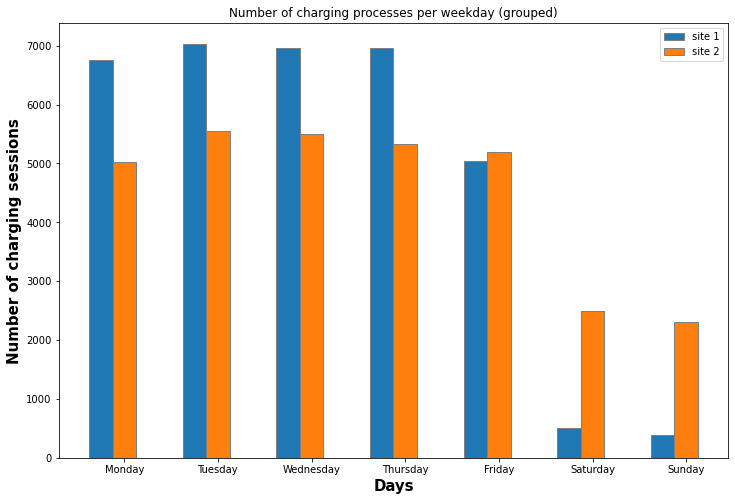

In [ ]:
days = sessions_per_weekday_site1.keys()
title = 'Number of charging processes per weekday (grouped)'
x_label = 'Days'
y_label = 'Number of charging sessions'
createGroupedBarChart(days, sessions_per_weekday_site1, sessions_per_weekday_site2, title, x_label, y_label)

During the week more charging takes place at site 1. However, the opposite is true for the weekend. In general, there are fewer charging sessions on weekends, but most of them are on site 2. This could be an indicator that site 1 is the private site that only employees of a company can access. The number of sessions would decrease at weekends because employees do not work or work less on these days and therefore do not charge their EVs.
Let's also have a look on the amount of kWh delivered.

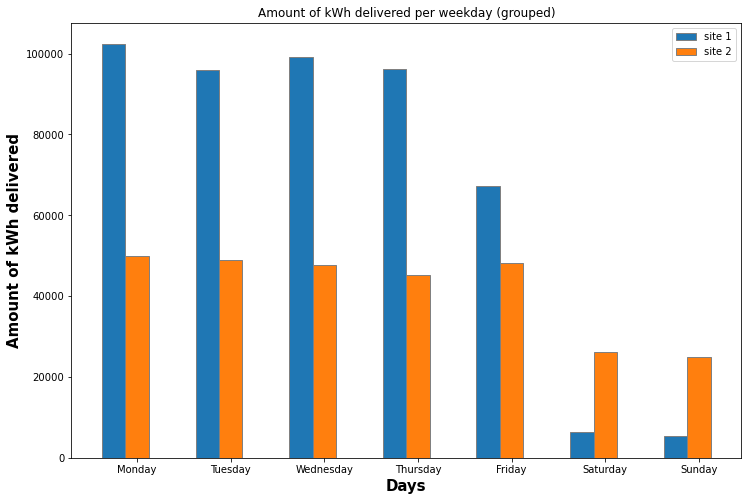

In [ ]:
days = sessions_per_weekday_site1.keys()
amount_kWh_per_weekday_site1 = df_sessions_site1.groupby('dayOfWeek')['kWhDelivered'].sum()
amount_kWh_per_weekday_site1 = amount_kWh_per_weekday_site1.groupby(['dayOfWeek']).sum().reindex(cats)
amount_kWh_per_weekday_site2 = df_sessions_site2.groupby('dayOfWeek')['kWhDelivered'].sum()
amount_kWh_per_weekday_site2 = amount_kWh_per_weekday_site2.groupby(['dayOfWeek']).sum().reindex(cats)
title = 'Amount of kWh delivered per weekday (grouped)'
x_label = 'Days'
y_label = 'Amount of kWh delivered'
createGroupedBarChart(days, amount_kWh_per_weekday_site1, amount_kWh_per_weekday_site2, title, x_label, y_label)

<p>This corresponds to the results for the number of charging sessions during the week. </p>
<p>In the following we will look at the charging behaviour during the day. As we have seen before, there is a big difference between weekdays and weekends. For that reason we will differentiate those days.</p>

In [ ]:
def createSessionCounterDataframe(x_values, counted_column, old_df):
    new_df = pd.DataFrame([(x, siteID) for x in x_values for siteID in old_df['siteID'].unique()],
                          columns = [counted_column, 'siteID'])
    counter_df = old_df.groupby([counted_column, 'siteID']).agg({'sessionID': 'nunique'}).reset_index()
    new_df = pd.merge(new_df, counter_df, how='left', on=[counted_column, 'siteID'])
    new_df['sessionID'] = new_df['sessionID'].fillna(0).astype(int)
    new_df.rename(columns={'sessionID': 'sessionCount'}, inplace=True)
    return new_df

In [ ]:
# add features weekday, connectionHour and disconnectHour
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_charging_sessions['dayOfWeek'] = df_charging_sessions['connectionTime'].dt.dayofweek
df_charging_sessions['dayOfWeek'] = df_charging_sessions['dayOfWeek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
df_charging_sessions["connectionHour"] = df_charging_sessions["connectionTime"].dt.hour
df_charging_sessions["disconnectHour"] = df_charging_sessions["disconnectTime"].dt.hour

# split into weekdays and weekends
charging_sessions_weekdays = df_charging_sessions[(df_charging_sessions['dayOfWeek'] == 'Monday') | (df_charging_sessions['dayOfWeek'] == 'Tuesday') | (df_charging_sessions['dayOfWeek'] == 'Wednesday') | (df_charging_sessions['dayOfWeek'] == 'Thursday') | (df_charging_sessions['dayOfWeek'] == 'Friday')]
charging_sessions_weekends = df_charging_sessions[(df_charging_sessions['dayOfWeek'] == 'Saturday') | (df_charging_sessions['dayOfWeek'] == 'Sunday')]

# create dataframe with connectionHour and counts of unique sessionIDs for weekdays
hours_of_day = list(range(24))
session_count_weekdays = createSessionCounterDataframe(hours_of_day, 'connectionHour', charging_sessions_weekdays)

# create dataframe with connectionHour and counts of unique sessionIDs for weekends
session_count_weekends = createSessionCounterDataframe(hours_of_day, 'connectionHour', charging_sessions_weekends)

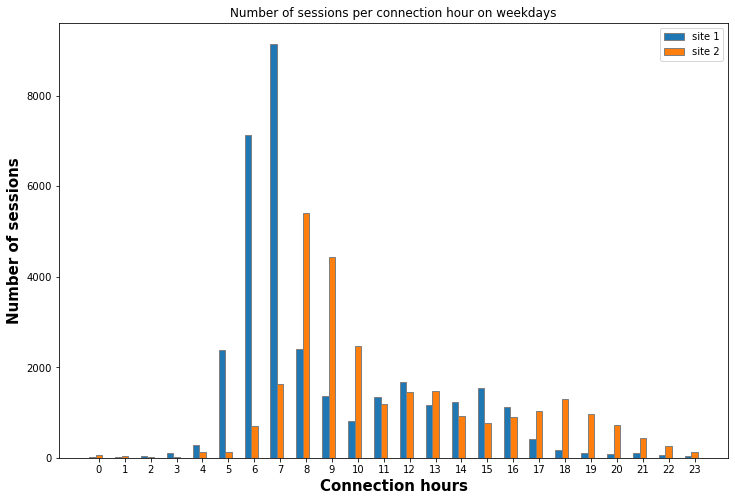

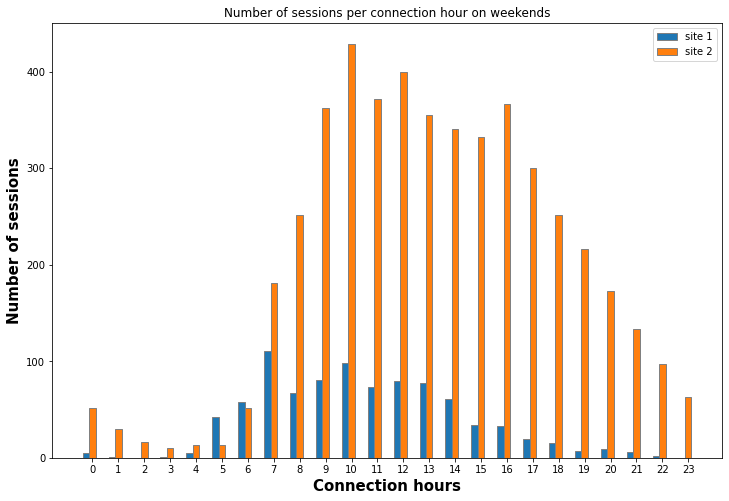

In [ ]:
hours = session_count_weekdays['connectionHour'].unique()
session_count_site1_weekdays = session_count_weekdays[session_count_weekdays['siteID'] == 1]['sessionCount']
session_count_site2_weekdays = session_count_weekdays[session_count_weekdays['siteID'] == 2]['sessionCount']
title = 'Number of sessions per connection hour on weekdays'
x_label = 'Connection hours'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1_weekdays, session_count_site2_weekdays, title, x_label, y_label)

hours = session_count_weekends['connectionHour'].unique()
session_count_site1_weekends = session_count_weekends[session_count_weekends['siteID'] == 1]['sessionCount']
session_count_site2_weekends = session_count_weekends[session_count_weekends['siteID'] == 2]['sessionCount']
title = 'Number of sessions per connection hour on weekends'
x_label = 'Connection hours'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1_weekends, session_count_site2_weekends, title, x_label, y_label)

<p>During the week, the number of sessions starts to increase rapidly around 5 a.m. at site 1. At 7 a.m. most sessions are started, i.e. cars are connected. After that, the number of sessions decreases with small increases in between. From 17:00 to 23:00, the number slowly approaches 0, so very few EVs are connected in this time frame. For site 2, the situation is slightly different. The rise to its peak at 8 a.m. starts a little later, at 6 a.m. At 8 a.m. the number of sessions in site 2 is double that of site 1. It remains higher until 11 a.m. As of 5 p.m., the numbers on both sites show a similar behaviour. In the evening hours there are again significantly more charging sessions in site 2 than in site 1.</p>
<p>During the weekend, the behaviour of both sites is similar. Very few sessions are started at the beginning of the day. The number increases rapidly around 7 a.m. and decreases from noon until the night. However, in site 2 the number is significantly higher.</p>

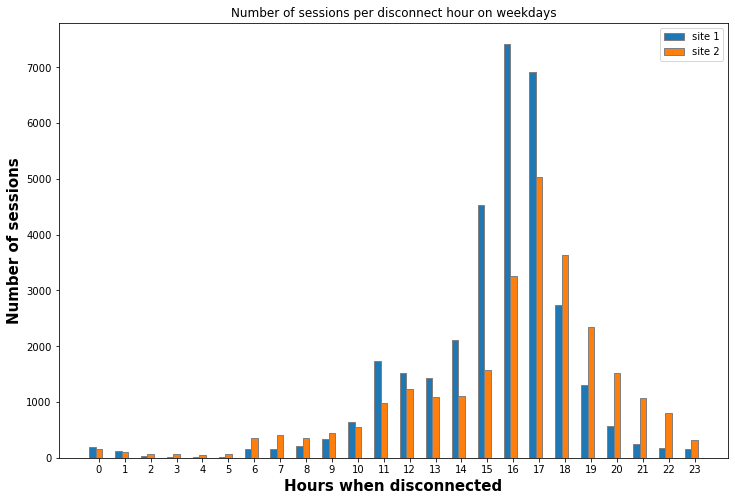

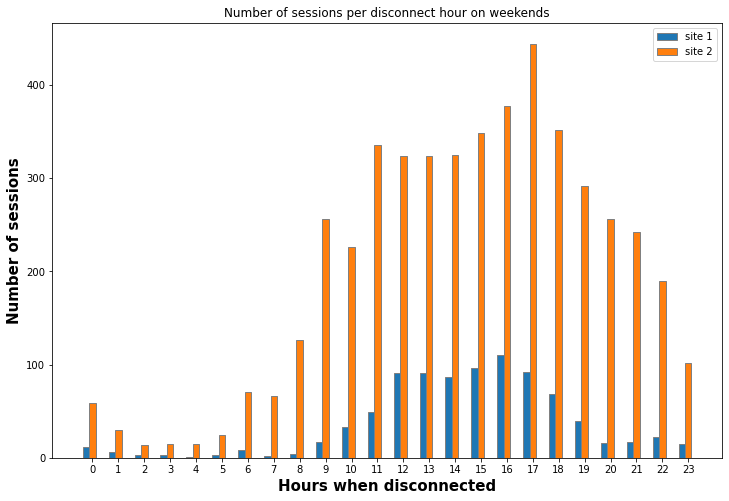

In [ ]:
# create dataframe with connectionHour and counts of unique sessionIDs
hours = list(range(24))
df_sessionCount_disconnectHour_weekdays = createSessionCounterDataframe(hours, 'disconnectHour',charging_sessions_weekdays)
df_sessionCount_disconnectHour_weekends = createSessionCounterDataframe(hours, 'disconnectHour',charging_sessions_weekends)

session_count_site1 = df_sessionCount_disconnectHour_weekdays[df_sessionCount_disconnectHour_weekdays['siteID'] == 1]['sessionCount']
session_count_site2 = df_sessionCount_disconnectHour_weekdays[df_sessionCount_disconnectHour_weekdays['siteID'] == 2]['sessionCount']
title = 'Number of sessions per disconnect hour on weekdays'
x_label = 'Hours when disconnected'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1, session_count_site2, title, x_label, y_label)

hours = df_sessionCount_disconnectHour_weekends['disconnectHour'].unique()
session_count_site1 = df_sessionCount_disconnectHour_weekends[df_sessionCount_disconnectHour_weekends['siteID'] == 1]['sessionCount']
session_count_site2 = df_sessionCount_disconnectHour_weekends[df_sessionCount_disconnectHour_weekends['siteID'] == 2]['sessionCount']
title = 'Number of sessions per disconnect hour on weekends'
x_label = 'Hours when disconnected'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1, session_count_site2, title, x_label, y_label)


Beschreibung hinzufügen

In the following, we will have a closer look at the users. First of all, we analyze the number of registered users on each site.
Afterwards, we want to see how the amount of users who must pay for charging differs between the two sites. 

In [ ]:
print(df_charging_sessions['userID'])

0         194.0
1        4275.0
2         344.0
3        1117.0
4         334.0
          ...  
66445     393.0
66446     220.0
66447    1974.0
66448     942.0
66449       NaN
Name: userID, Length: 66450, dtype: float64


In [ ]:
df_user_info = df_charging_sessions[df_charging_sessions['userInformation']==True] 
df_user_info = df_user_info[['id','userID','siteID', 'userInputs']]
def extract_payment_required(dict_list):
    try:
        dict_list = ast.literal_eval(dict_list)
        for entry in dict_list:
            return entry.get('paymentRequired')
    except AttributeError as e:
        print(f"Attribute Error: {e}")
        return None

df_user_info['paymentRequired'] = df_user_info['userInputs'].apply(extract_payment_required)
print(df_user_info[df_user_info['paymentRequired']==False])

Empty DataFrame
Columns: [id, userID, siteID, userInputs, paymentRequired]
Index: []


Every user has to pay. Therefore, no information can be gained from this column.
# umformulierne -> für diese Aufgabe

[WhPerMile                                       400
kWhRequested                                      8
milesRequested                                   20
minutesAvailable                                 65
modifiedAt            Thu, 02 Jan 2020 14:00:03 GMT
paymentRequired                                True
requestedDeparture    Thu, 02 Jan 2020 15:04:58 GMT
userID                                         1117
dtype: object, WhPerMile                                       400
kWhRequested                                      8
milesRequested                                   20
minutesAvailable                                 65
modifiedAt            Thu, 02 Jan 2020 14:00:19 GMT
paymentRequired                                True
requestedDeparture    Thu, 02 Jan 2020 15:04:58 GMT
userID                                         1117
dtype: object]


relativ auf registered users eingehen